# 4.2 Bond behavior governed by plasticity
Define a bond-slip law governed yielding with hardening or softening.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import sympy as sp
sp.init_printing()

## The onset of inelasticity

In [2]:
s_el = sp.symbols('s_el')
E_b = sp.symbols('E_\mathrm{b}', positive=True)
tau_ =  E_b * s_el
tau_

In [3]:
s, s_pl = sp.symbols('s, s_pl')
s_el_ = s - s_pl
tau_.subs(s_el, s_el_)

In [4]:
tau = sp.symbols(r'\tau')
tau_bar = sp.symbols(r'\bar{\tau}')
f_tau = sp.sqrt( tau * tau ) - tau_bar
f_tau

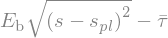

In [5]:
f_s = f_tau.subs(tau, tau_).subs(s_el, s_el_)
f_s

The question is, how does the stress develop in the inelastic regime?
This means when $f = 0$?

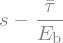

In [6]:
s_pl_f0 = sp.solve(f_s, s_pl)
s_pl_f0[0]

In [7]:
tau_.subs(s_el, s_el_).subs(s_pl, s_pl_f0[1])

So far, so good. We obtained a trivial result telling us that the stress cannot grow over the 
introduced elasticity limit. But in this case we can just reproduce the constant bond-slip 
law - now extended with a elastic stiffness. How to provide a general framework suitable
for an algorithmic treatment? How to distinguish between loading and unloading?

So how much plastic deformation was consumed? What was the direction of flow? 
There might be several different processes going on the material structure?
Let us postulate, that they can be clustered by a positive flow variable $\lambda$. Then
we assume that the rate of change of all state variables representing yielding 
can be related to the common positive parameter $\lambda$ and that the yielding direction 
is normal to the yield surface $f$

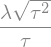

In [8]:
lambda_ = sp.symbols(r'\lambda', nonnegative=True)
dot_s_pl_ = lambda_ * f_tau.diff(tau)
dot_s_pl_

**Relate increment of yielding to the increment of primary kinematic state variables**

But what is the amount of yielding controlled now by $\lambda$? Solving for $f = 0$ is not 
of much help any more. Can the elastic range change during the yielding process? An abstract
distinction between elastic and inelastic loading processes can be provided by Kuhn-Tucker conditions
\begin{align}
  \lambda \dot{f} = 0, \; \lambda > 0,\; \dot{f} \le 0
\end{align}

In [9]:
dot_s, dot_s_pl = sp.symbols(r'\dot{s}, \dot{s}_\mathrm{pl}')
dot_tau_ = E_b * (dot_s - dot_s_pl)
dot_tau_

In [10]:
dot_f = f_tau.diff(tau) * dot_tau_.subs(dot_s_pl, dot_s_pl_)

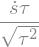

In [11]:
lambda_solved = sp.solve( dot_f, lambda_)[0]
lambda_solved

In [12]:
dot_s_pl_.subs(lambda_, lambda_solved)

In [13]:
dot_tau_.subs(dot_s_pl, dot_s_pl_).subs(lambda_, lambda_solved)

[Convex mathematical programming literature]

## Can the elastic range expand?

In [14]:
z = sp.symbols('z')
K = sp.symbols('K', positive=True )
Z = sp.symbols('Z')
f_tau = sp.sqrt(tau**2) - (tau_bar + Z)
f_tau

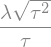

In [15]:
dot_s_pl_ = lambda_ * f_tau.diff(tau)
dot_s_pl_

In [16]:
dot_z_ = - lambda_ * f_tau.diff(Z)
dot_z_

\begin{align}
 \dot{f} = 
     \frac{\partial f}{\partial \tau} \dot{\tau} 
+
     \frac{\partial f}{\partial Z} \dot{Z}
\end{align}

In [17]:
dot_z = sp.symbols(r'\dot{z}')
dot_Z_ = K * dot_z
dot_Z_

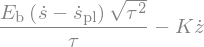

In [18]:
dot_f = f_tau.diff(tau) * dot_tau_ + f_tau.diff(Z) * dot_Z_
dot_f

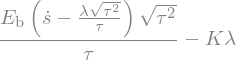

In [19]:
dot_f_lambda = dot_f.subs(dot_s_pl, dot_s_pl_).subs(dot_z, dot_z_)
dot_f_lambda

In [20]:
lambda_solved = sp.solve(dot_f_lambda, lambda_)[0]

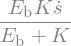

In [21]:
sp.simplify(dot_tau_.subs(dot_s_pl, dot_s_pl_).subs(lambda_, lambda_solved))

## Construct the bond slip model

Given an increment of slip, calculate the corresponding amount of stress 
regarding the current state of the material

Let us now solve this problem numerically
\begin{align}
\end{align}